<a href="https://colab.research.google.com/github/lak-sh-man/EDA-on-global-terrorism/blob/main/global_terrorism_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Terrorism Exploratory Data Analysis


## 1. Connect the data in Drive to Colab

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive"

'ALL FILES'  'Colab Notebooks'	'LAKSHMAN '


## 2. Data Preparation and Cleaning


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as wg
wg.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/global-terrorism/global-terrorism.csv", encoding="latin1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.shape

(181691, 135)

In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [ ]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## 3. Exploratory analysis & Visualization

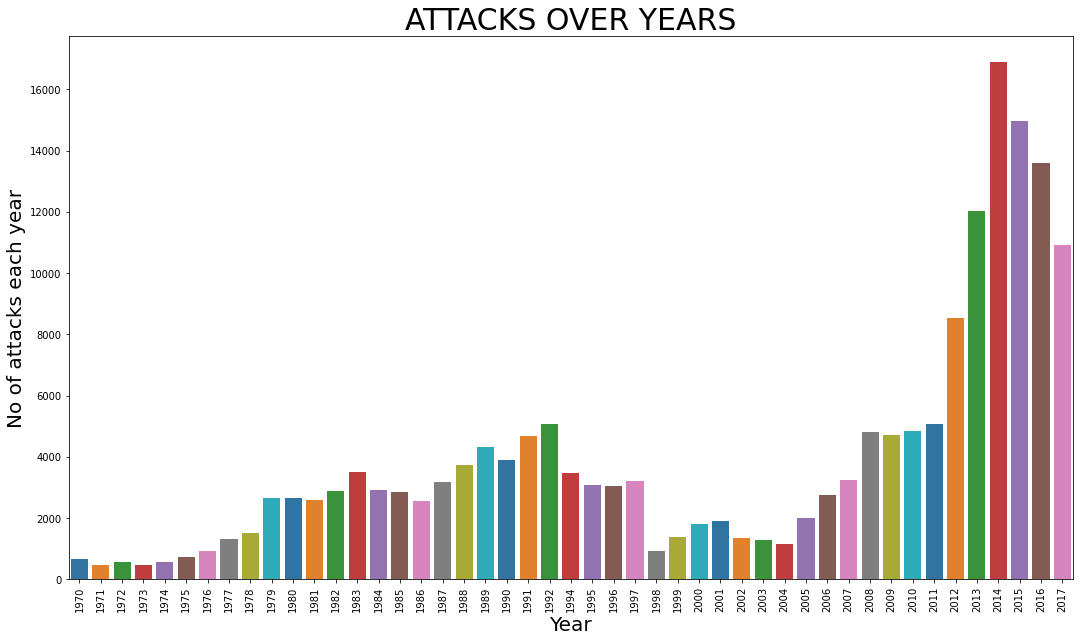

In [ ]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=20)
plt.ylabel('No of attacks each year',fontsize=20)
plt.title('ATTACKS OVER YEARS',fontsize=30)
plt.show()

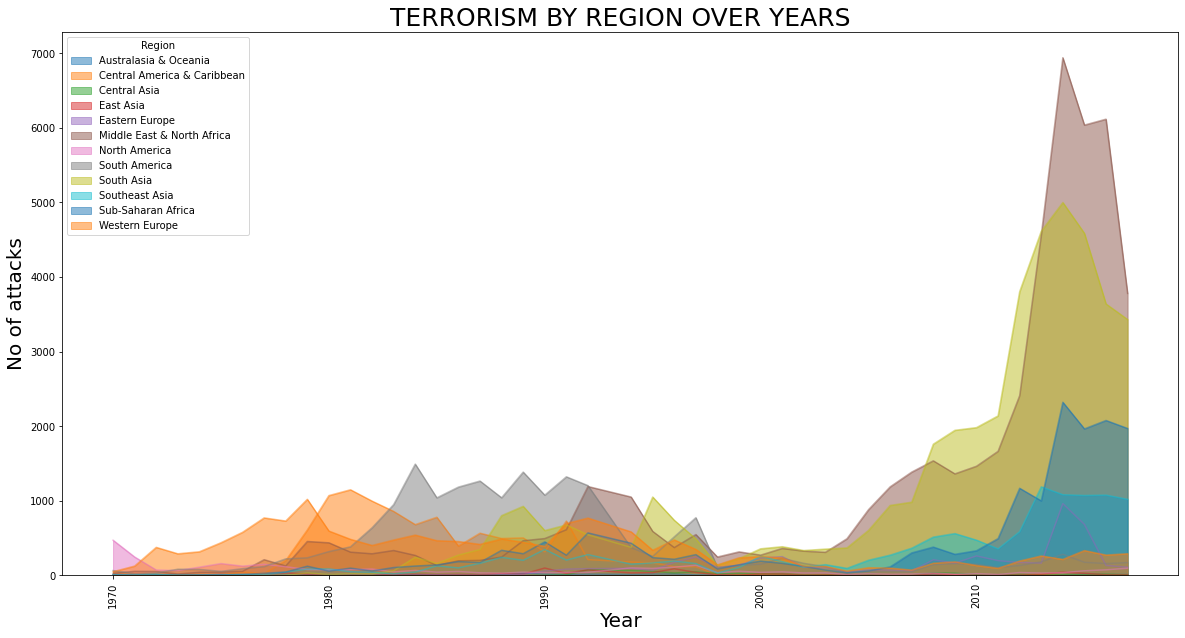

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('TERRORISM BY REGION OVER YEARS',fontsize=25)
plt.xticks(rotation = 90)
plt.ylabel('No of attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [ ]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [ ]:
data.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

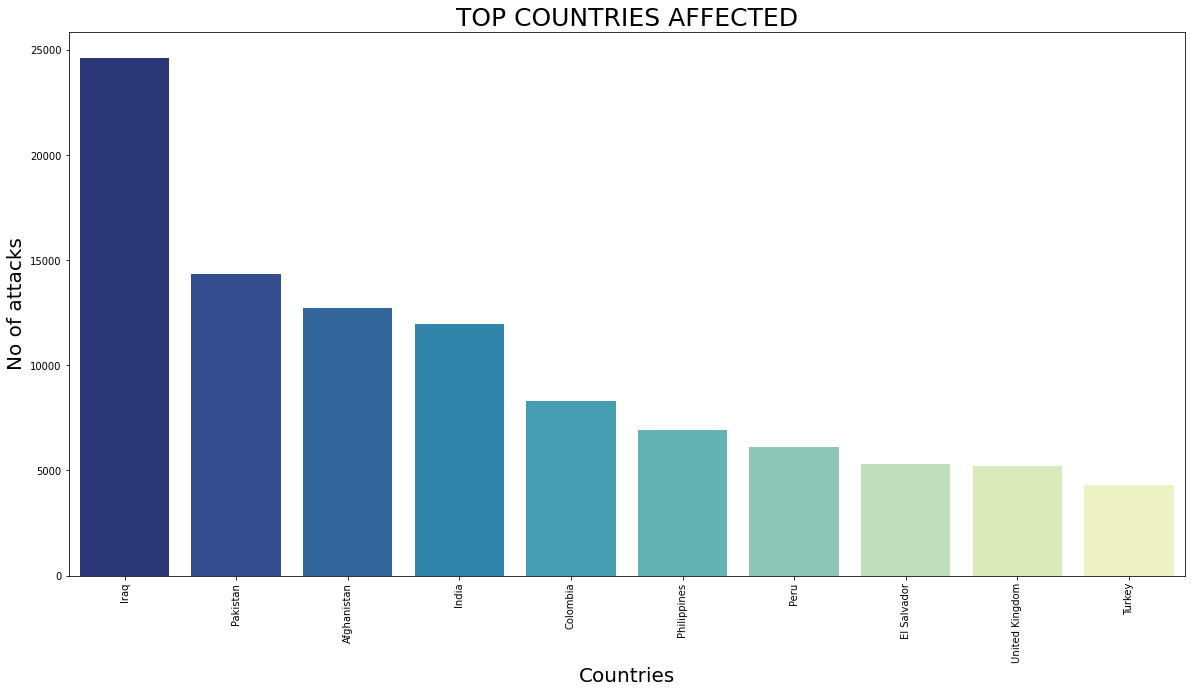

In [ ]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlGnBu_r')
plt.title('TOP COUNTRIES AFFECTED',fontsize=25)
plt.xlabel('Countries',fontsize=20)
plt.ylabel('No of attacks',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

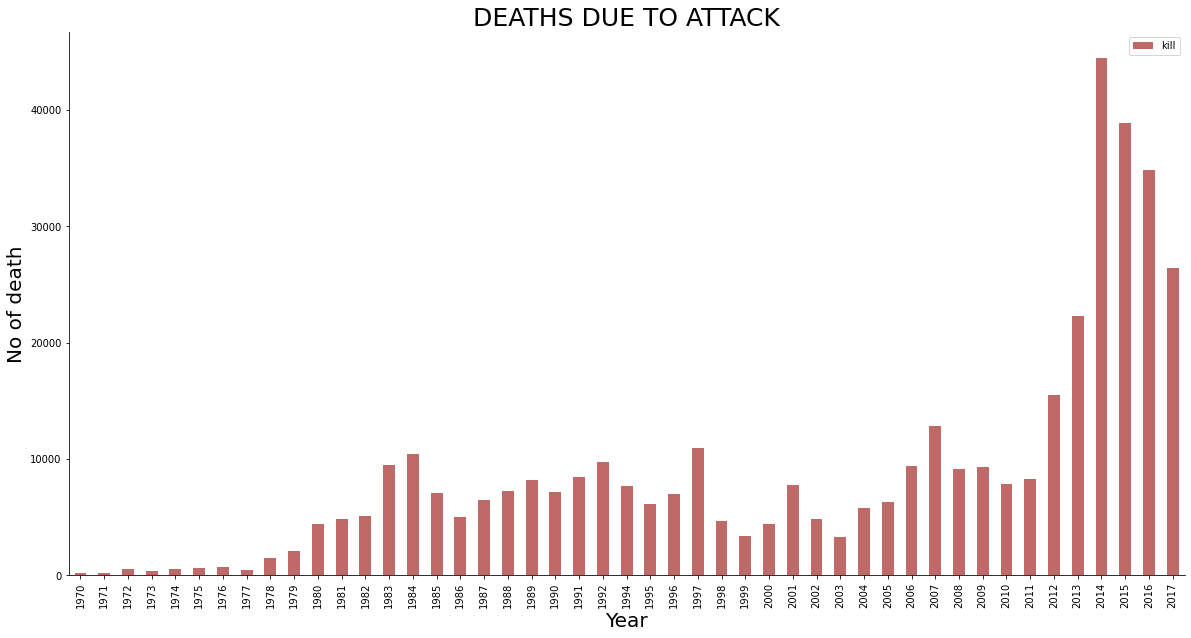

In [ ]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.7,ax=ax4,color='brown')
plt.xticks(rotation = 90)
plt.title("DEATHS DUE TO ATTACK",fontsize=25)
plt.ylabel("No of death",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

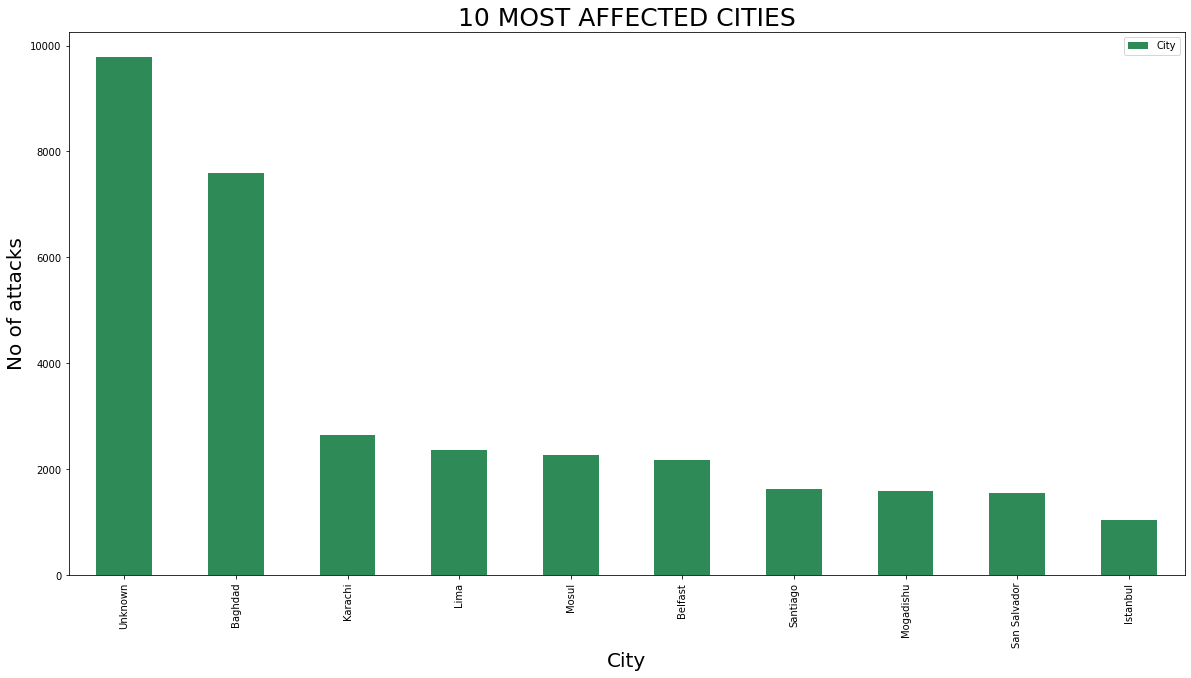

In [ ]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='seagreen')
plt.xticks(rotation = 90)
plt.xlabel("City",fontsize=20)
plt.ylabel("No of attacks",fontsize=20)
plt.title("10 MOST AFFECTED CITIES",fontsize=25)
plt.show()

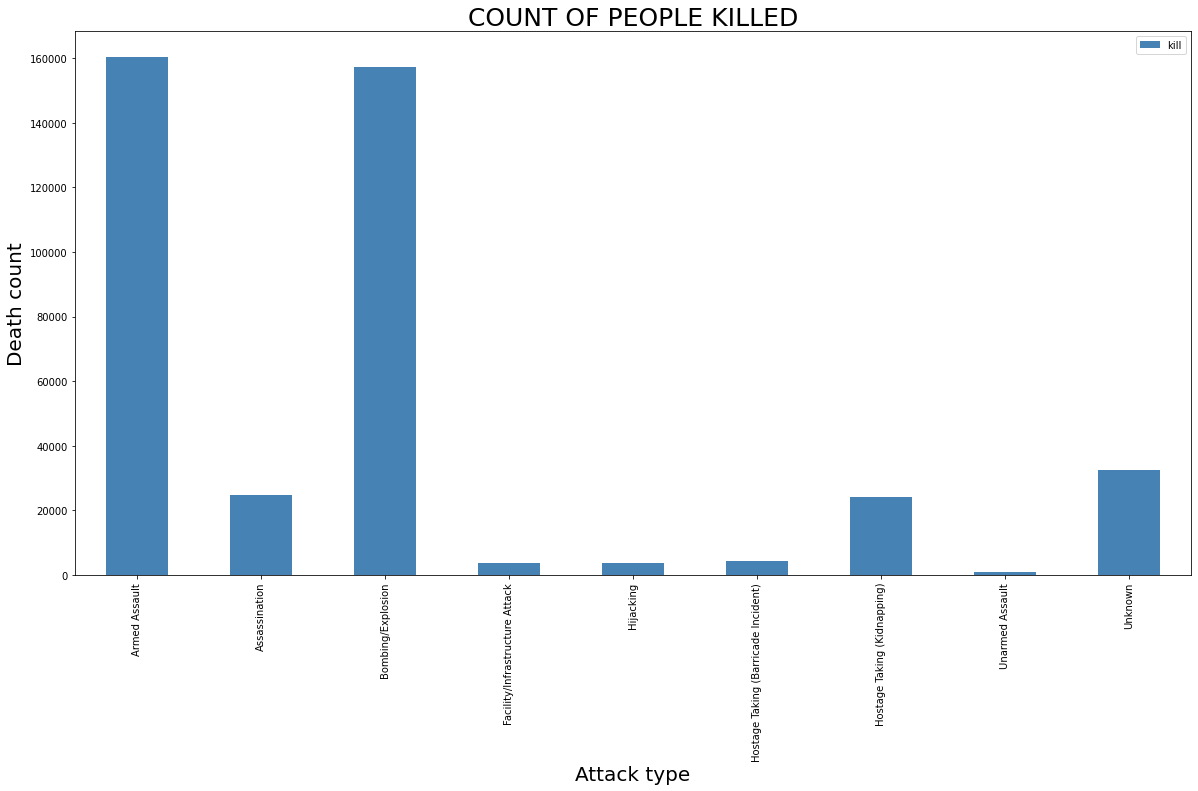

In [ ]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['steelblue'])
plt.xticks(rotation=90)
plt.title("COUNT OF PEOPLE KILLED",fontsize=25)
plt.ylabel('Death count',fontsize=20)
plt.xlabel('Attack type',fontsize=20)
plt.show()

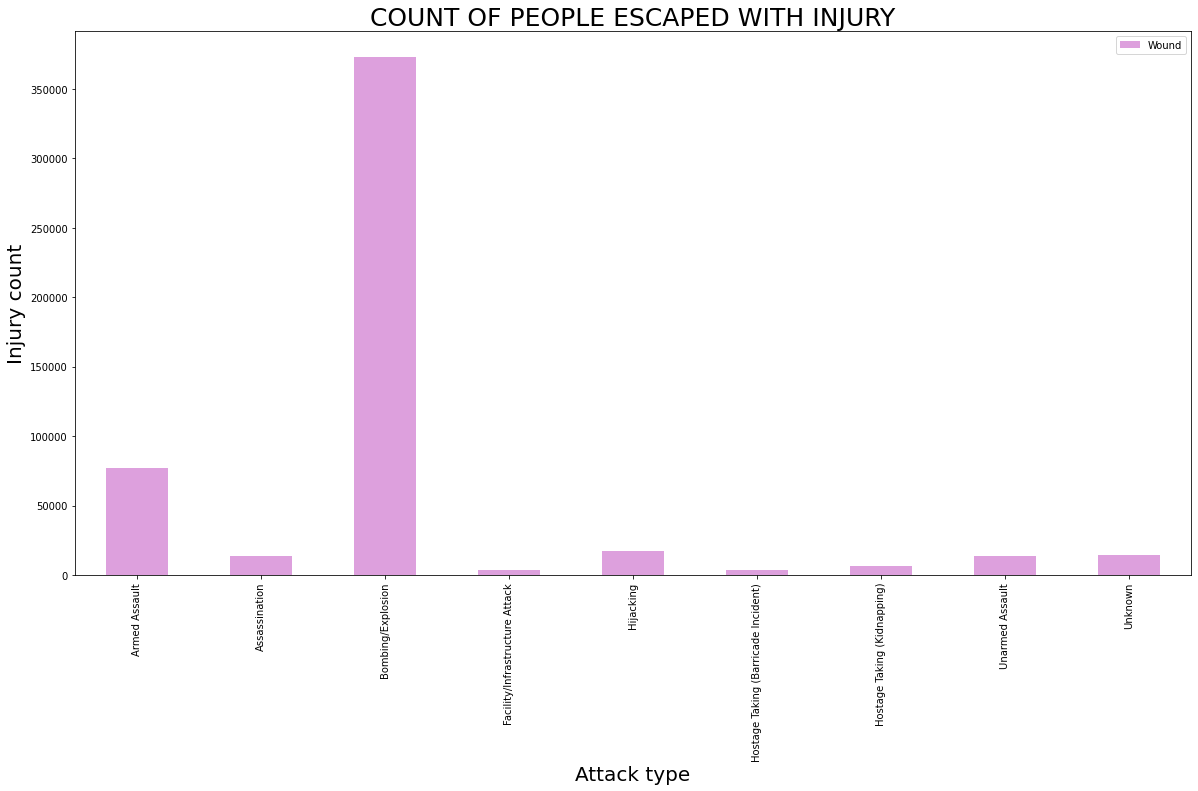

In [ ]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['plum'])
plt.xticks(rotation=90)
plt.title("COUNT OF PEOPLE ESCAPED WITH INJURY",fontsize=25)
plt.ylabel('Injury count',fontsize=20)
plt.xlabel('Attack type',fontsize=20)
plt.show()

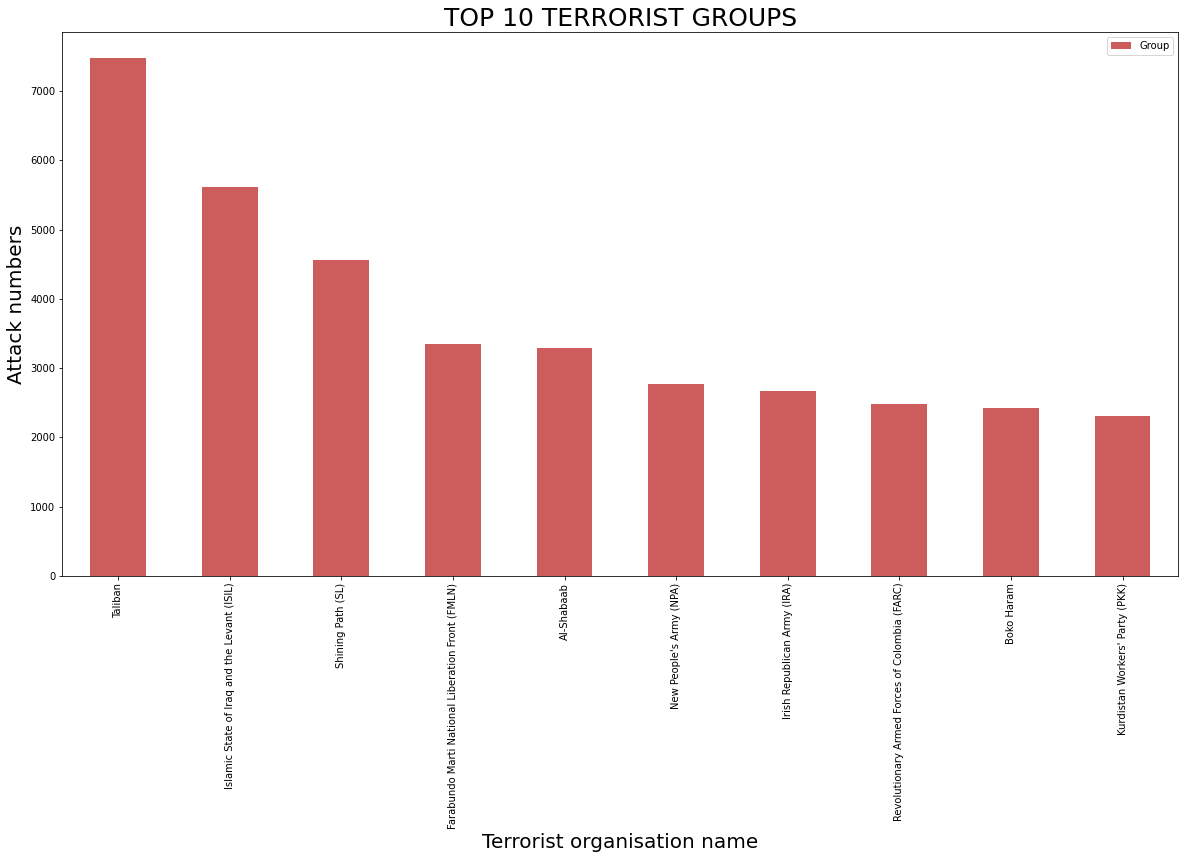

In [ ]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='Indianred',figsize=(20,10))
plt.title("TOP 10 TERRORIST GROUPS",fontsize=25)
plt.xticks(rotation = 90)
plt.xlabel("Terrorist organisation name",fontsize=20)
plt.ylabel("Attack numbers",fontsize=20)
plt.show()

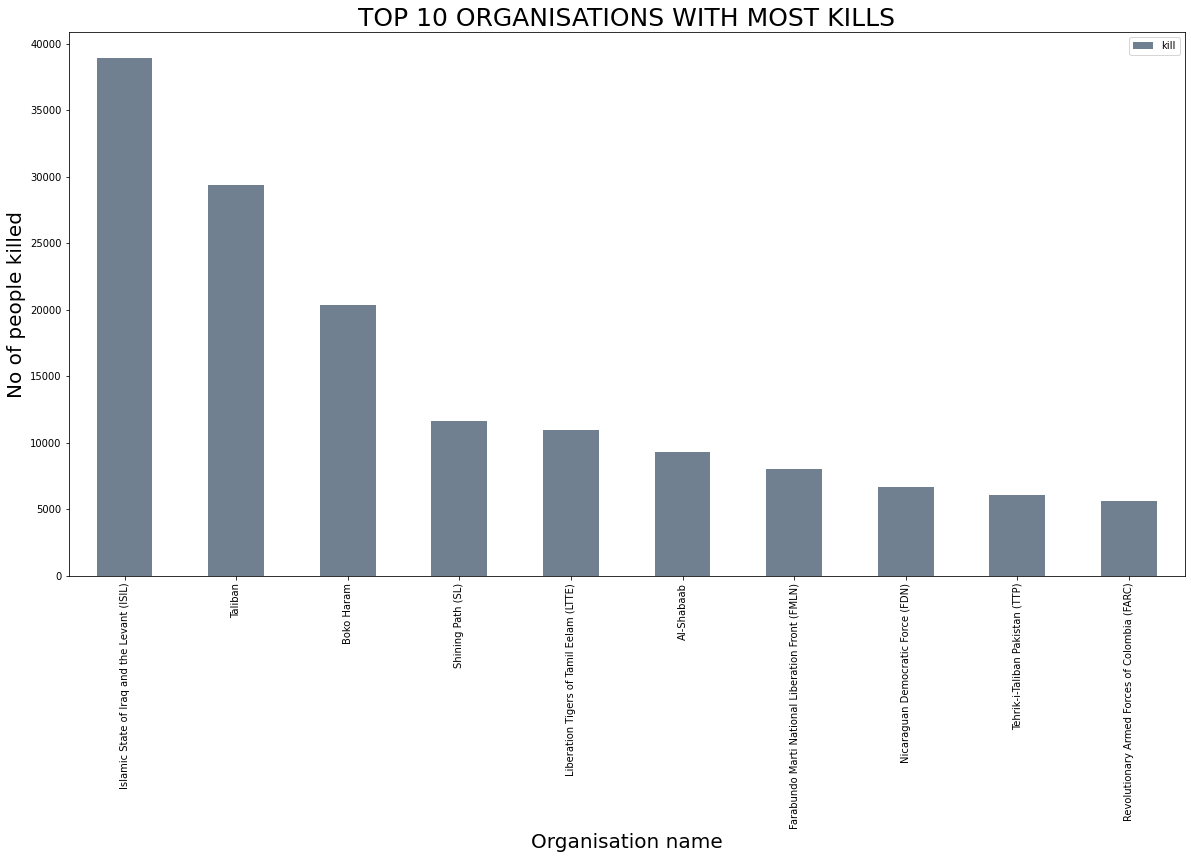

In [ ]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='slategray',figsize=(20,10))
plt.title("TOP 10 ORGANISATIONS WITH MOST KILLS",fontsize=25)
plt.xlabel("Organisation name",fontsize=20)
plt.ylabel("No of people killed",fontsize=20)
plt.show()

## 4. Summary and Conclusions
Insights :

- 2014 has more number of attacks over the count of 16,000
- Middle east & North africa has more number of attacks after 2010
- Iraq is the most affected country with nearly 25,000 attacks
- 2014 has most number of deaths over 40,000 
- Bombing & armed assault made almost same death count of 1,60,000
- Bombing made huge survived casualities over 3,50,000
- Taliban is the most notorious organisation with more than 7,000 attacks
- ISIL is the organisation with most kills over 35,000